#Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#Exploratory Data Analysis

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [17]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [18]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [19]:
df['type'].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [20]:
cols = df.columns[1:-1]

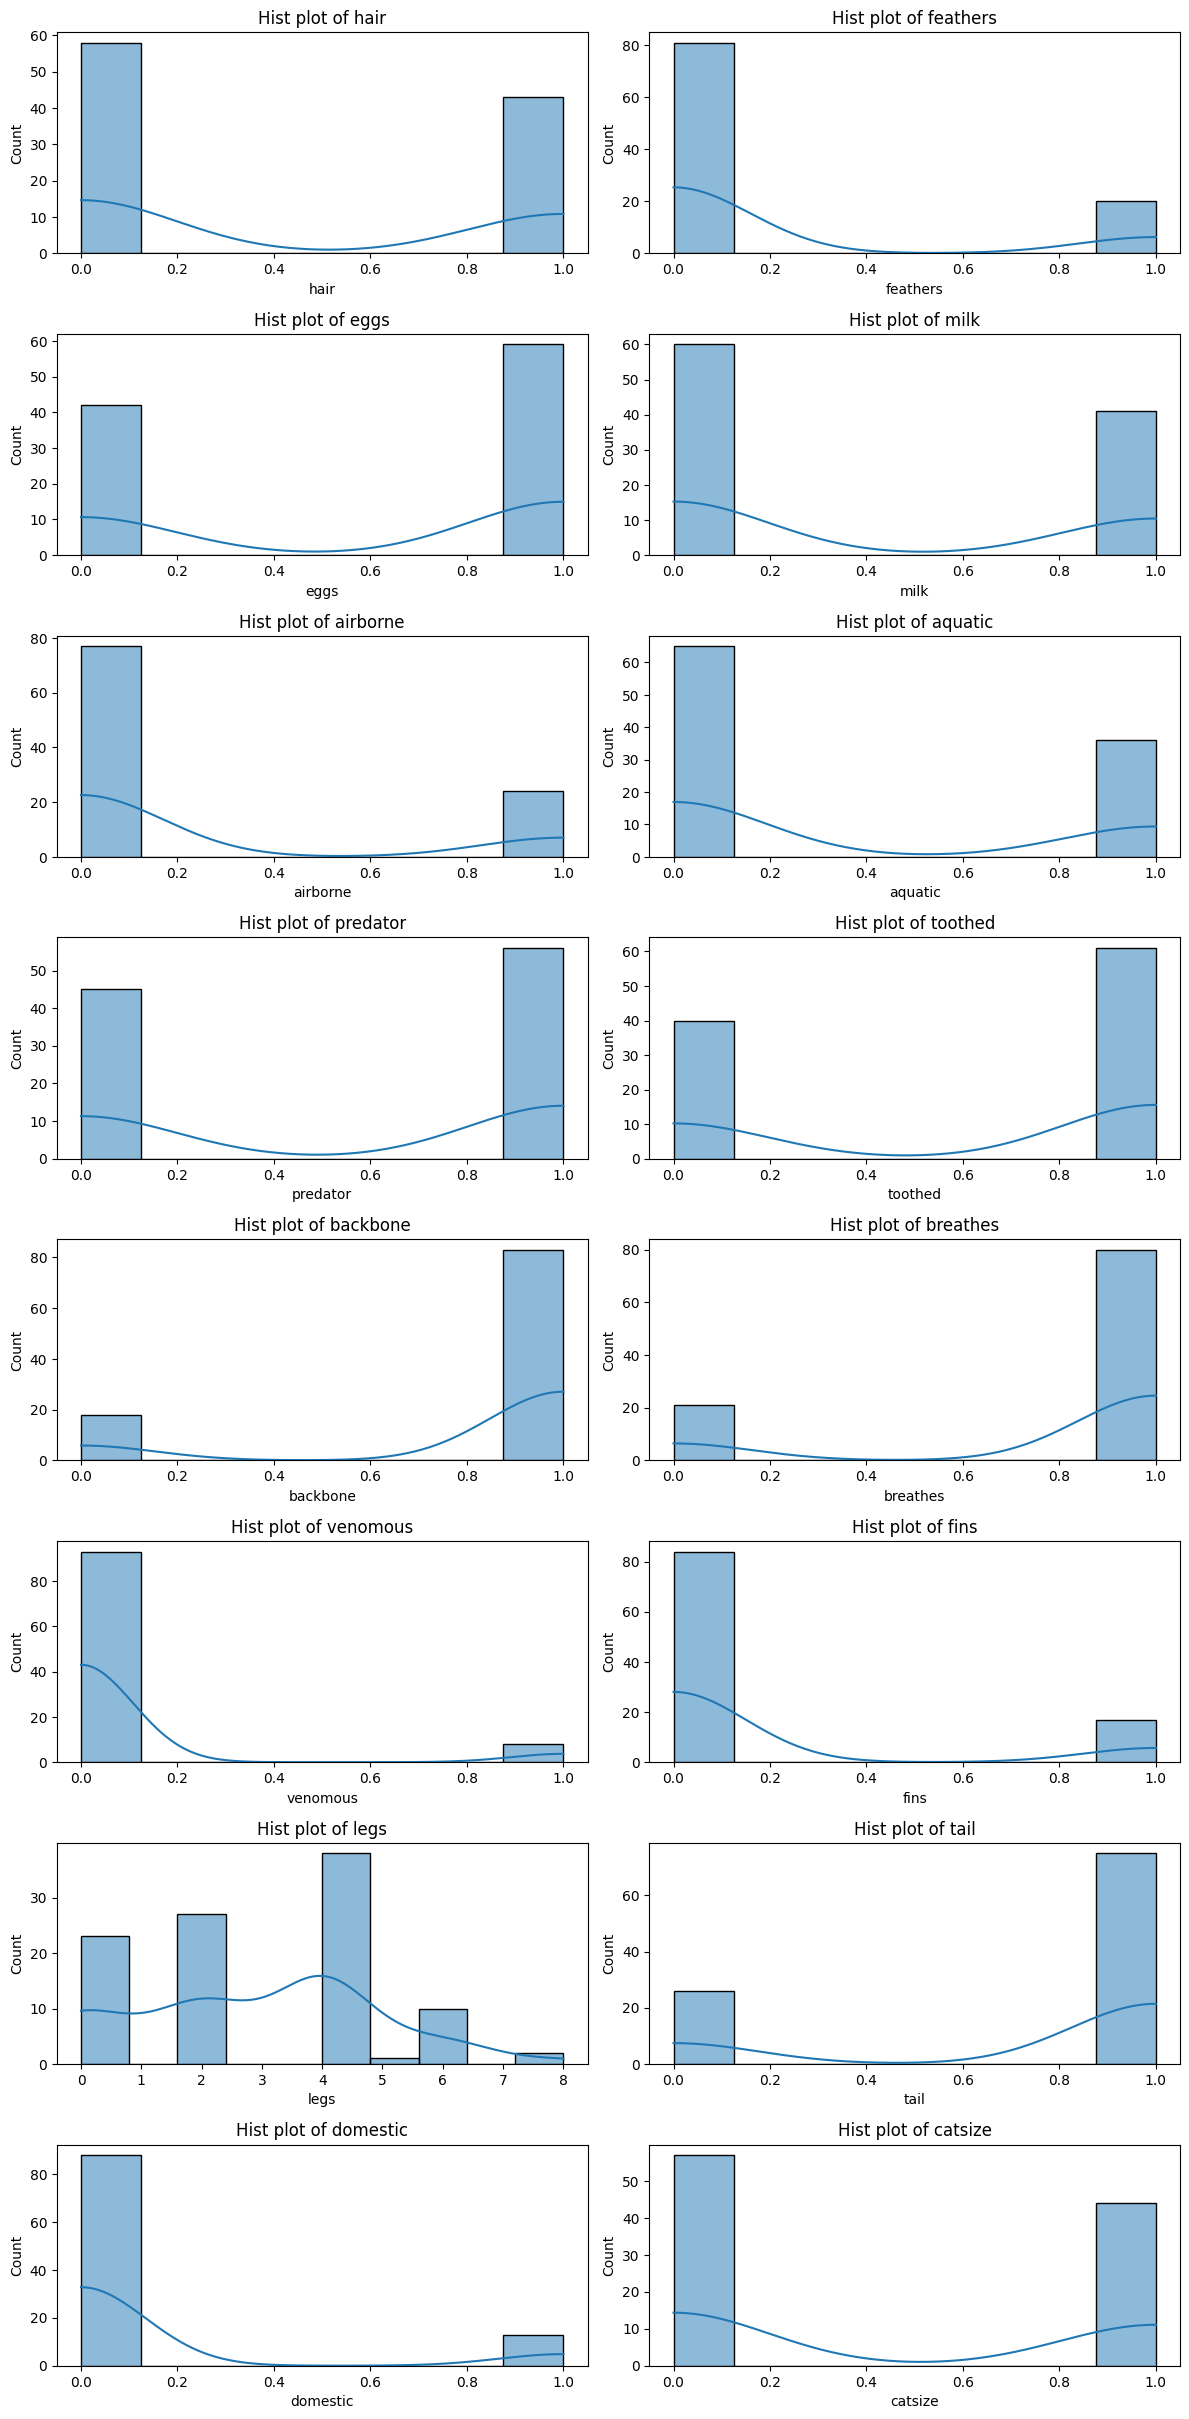

In [27]:
plt.figure(figsize=(12,len(cols)*3))
for i,fe in enumerate(cols,1):
    plt.subplot(len(cols),2,i)
    sns.histplot(data=df,x=fe,kde=True,palette='viridis')
    plt.title(f"Hist plot of {fe}")
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

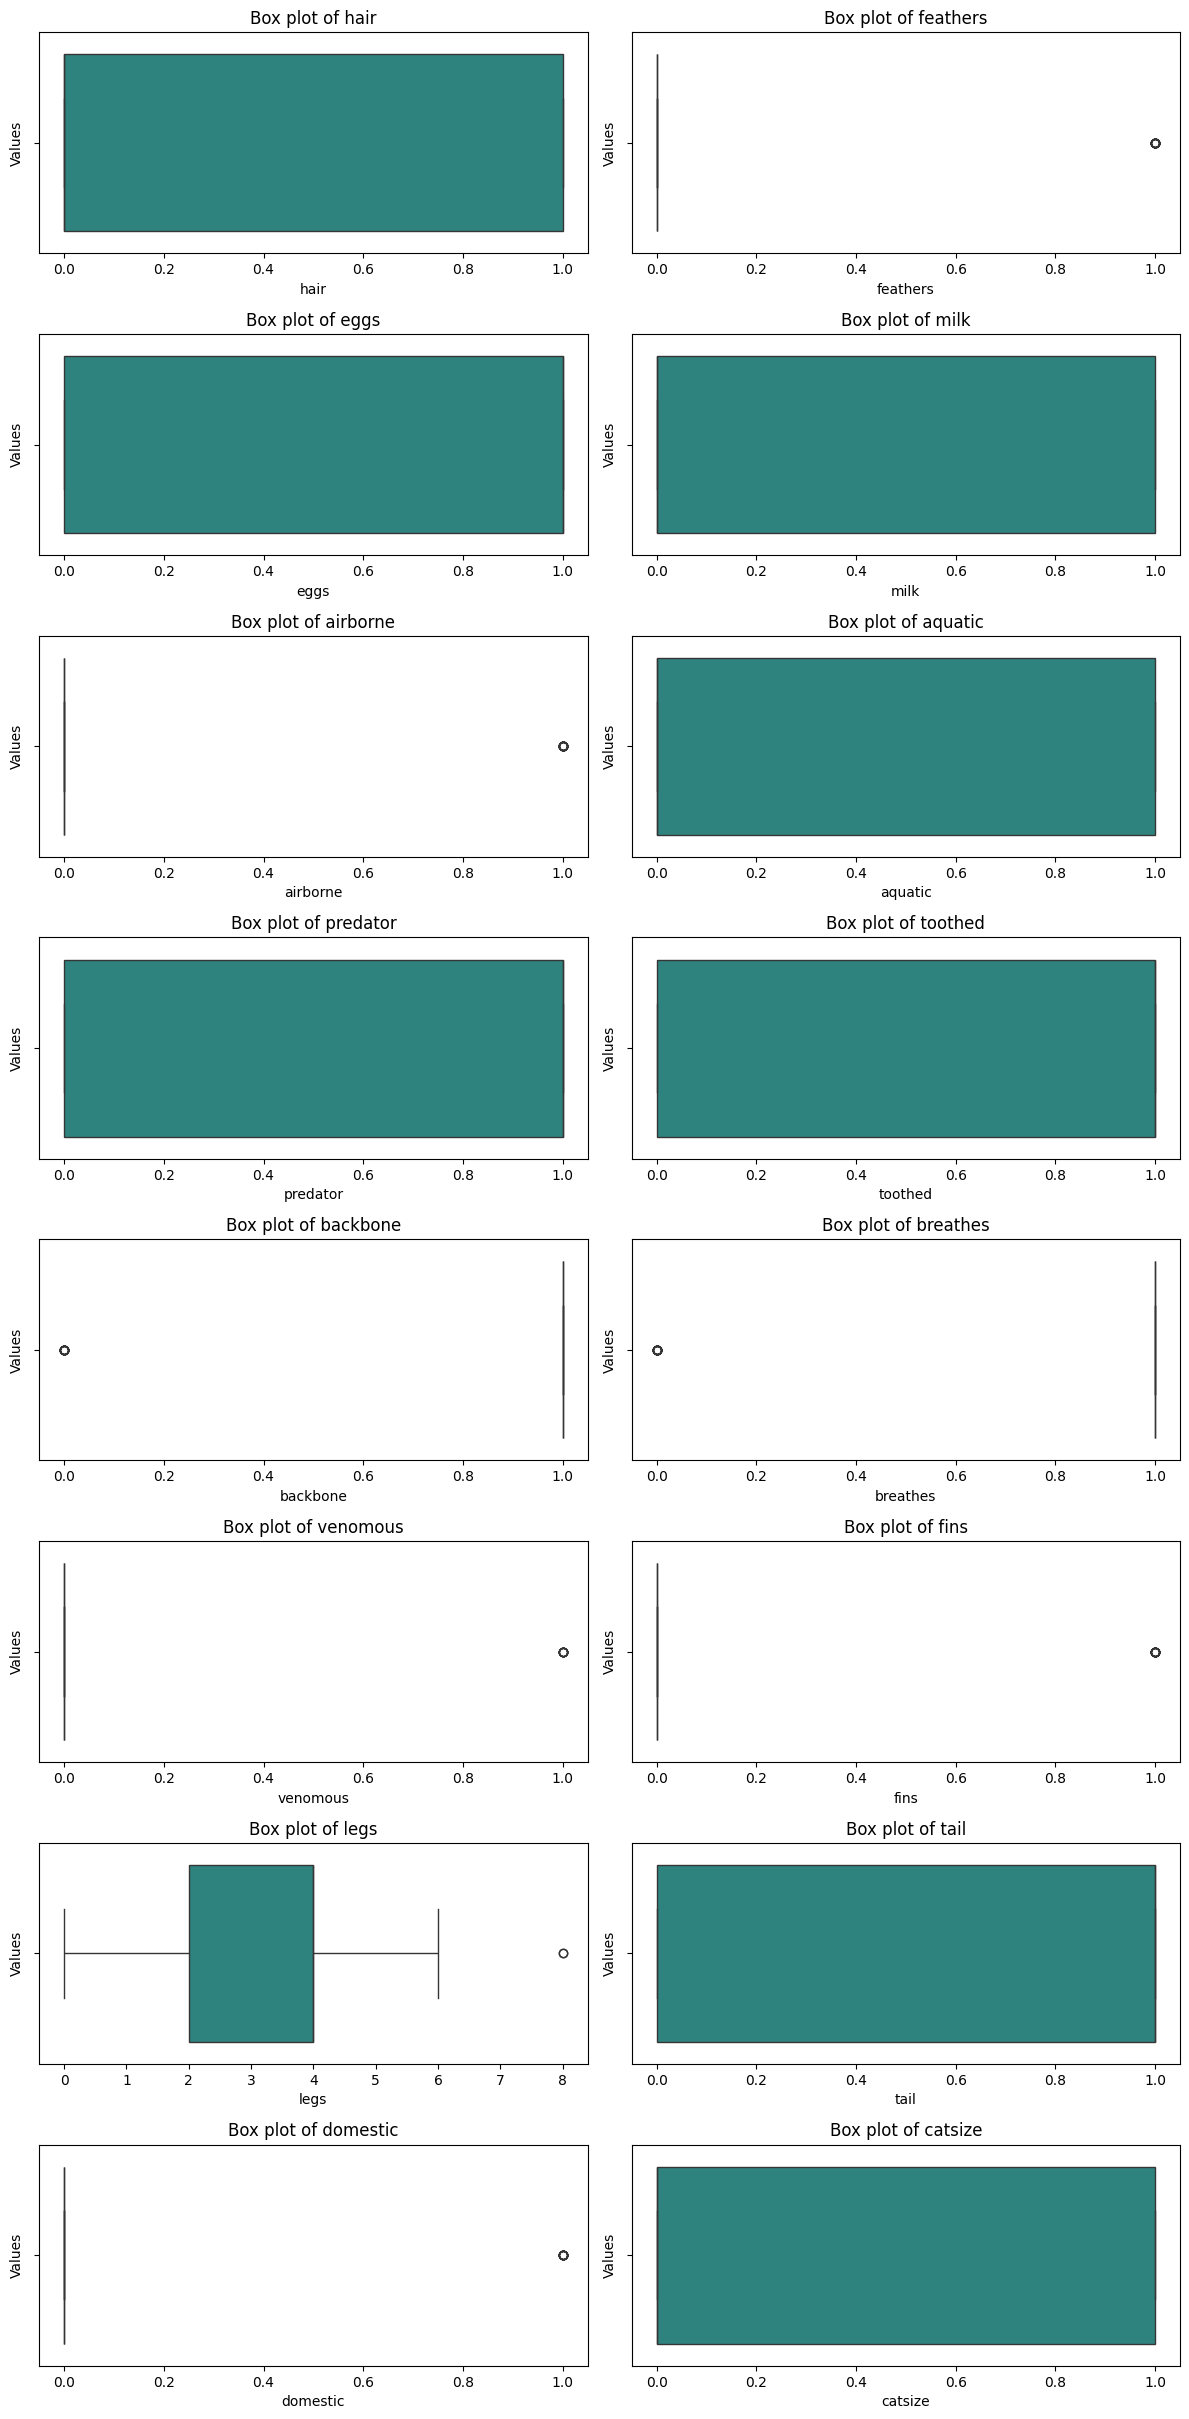

In [30]:
plt.figure(figsize=(12,len(cols)*3))
for i,fe in enumerate(cols,1):
    plt.subplot(len(cols),2,i)
    sns.boxplot(data=df,x=fe,palette='viridis')
    plt.title(f"Box plot of {fe}")
    plt.xlabel(fe)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

#Splitting Dataset

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(columns=['animal name','type'],axis=1)
y = df['type']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Implementing K-Nearest Neighbours Algorithum

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
from sklearn.metrics import accuracy_score, classification_report

In [40]:
y_pred = knn.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.9047619047619048

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



#Choosing Distance Metric and Value for k

In [47]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'n_neighbors': range(1,21)}
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [52]:
best_k = grid_search.best_params_
print(f"Optimal value for K: {best_k}")

Optimal value for K: {'n_neighbors': 1}


In [53]:
knn  = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
y_pred = knn.predict(X_test)

#Evaluating Classifier performance

In [56]:
accuracy_score(y_test,y_pred)

1.0

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



#Visualizing Decison Boundaries

In [58]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    knn.fit(X,y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('KNN Decision Boundaries')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

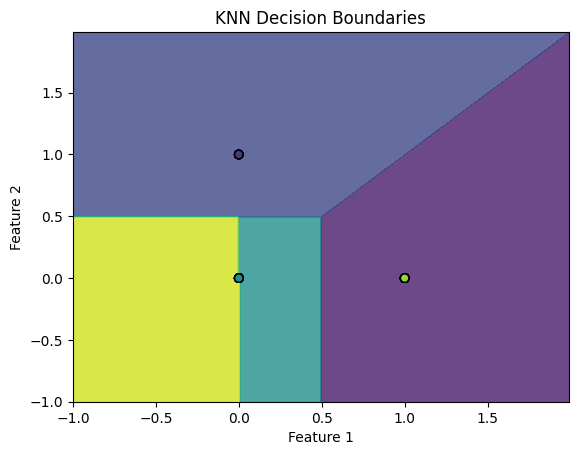

In [59]:
plot_decision_boundaries(X_train[['hair','feathers']],y_train)

#Interview Questions

# What are the key hyperparameters in KNN?

1. n_neighbors(k):
   - This is the most important hyperparameter, representing the number of nearest neighbors to consider when making predictions.
2. weights:
   - This determines how much influence each neighbor has on the prediction.
3. metric:
   - This defines the distance metric used to compute distances between points.
   - Common metrics include:
     - euclidean: The standard distance metric.
     - manhattan: The sum of absolute differences.
     - minkowski: A generalization of both Euclidean and Manhattan distances.
4. p:
   - This parameter is used when the Minkowski distance is selected as the metric. It defines the power parameter for the Minkowski distance, where p = 1 corresponds to Manhattan distance and p = 2 corresponds to Euclidean distance.
5. leaf_size:
   - This parameter affects the speed of nearest neighbor searches and memory usage in tree-based algorithms.
6. metric_params:
   - Additional keyword arguments for the distance metric, allowing customization of how distances are calculated.
7. n_jobs:
   - This parameter specifies the number of parallel jobs torun for neighbors search, which can speed up computationson large datasets.
  
Tuning these hyperparameters can significantly affect KNN's performance, including its accuracy, precision, and computational efficiencyistance.